![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

## Objetivos

In this project, you will use regression models to predict the number of days a customer rents DVDs for.

As with most data science projects, you will need to pre-process the data provided, in this case, a csv file called `rental_info.csv`. Specifically, you need to:

- Read in the csv file `rental_info.csv` using `pandas`.
- Create a column named `"rental_length_days"` using the columns `"return_date"` and `"rental_date"`, and add it to the pandas DataFrame. This column should contain information on how many days a DVD has been rented by a customer.
- Create two columns of dummy variables from `"special_features"`, which takes the value of 1 when:
    The value is `"Deleted Scenes"`, storing as a column called `"deleted_scenes"`.
    The value is `"Behind the Scenes"`, storing as a column called `"behind_the_scenes"`.
- Make a pandas DataFrame called X containing all the appropriate features you can use to run the regression models, avoiding columns that leak data about the target.
- Choose the `"rental_length_days"` as the target column and save it as a pandas Series called y.

Following the preprocessing you will need to:

Split the data into X_train, y_train, X_test, and y_test train and test sets, avoiding any features that leak data about the target variable, and include 20% of the total data in the test set.
Set random_state to 9 whenever you use a function/method involving randomness, for example, when doing a test-train split.

Recommend a model yielding a mean squared error (MSE) less than 3 on the test set

Save the model you would recommend as a variable named best_model, and save its MSE on the test set as best_mse.

In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rental_df = pd.read_csv("rental_info.csv")
rental_df

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,2005-08-22 10:49:15+00:00,2005-08-29 09:52:15+00:00,6.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,48.8601,7744.0,24.9001
15857,2005-07-31 09:48:49+00:00,2005-08-04 10:53:49+00:00,4.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,24.9001,7744.0,24.9001
15858,2005-08-20 10:35:30+00:00,2005-08-29 13:03:30+00:00,8.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,80.8201,7744.0,24.9001
15859,2005-07-31 13:10:20+00:00,2005-08-08 14:07:20+00:00,7.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,63.8401,7744.0,24.9001


# Minha Solução

## Discussão do Problema

O problema proposta busca definir um modelo de regressão que seja capaz de prever, com um MSE máximo de 3, **qual será o número de dias que um cliente irá alugar um dvd**.

A ideia aqui é que o modelo de regressão permita trazer uma informação/estimativa para novos dados. Trata-se de um problema de aprendizado supervisionado, já que temos informações sobre o tempo de empréstimo, que pode ser derivado da data do empréstimo e data de retorno.

O dataset apresenta 15861, onde cada linha retém um dado de um empréstimo (início e fim). Neste ponto, algumas explorações serão necessárias para responder a seguinte questão: Filmes que não foram devolvidos contam como NaN na coluna de return_date? Como Lidar com essa informação?

De cara, podemos inferir que algumas informações podem se apresentar relevantes, como `amount` (valor financeiro da fita), `release_year`(filmes novos podem ser mais roubados...) e `rental_rate` (custo de um empréstimo). 

Outras features podem apresentar impacto positivo, como a presença de special_features -> talvez seja necessário criar dummies para identificação numérica desta feature, assim como já foi feito no projeto de movie_rating.

Qual será o melhor modelo? DecisionTreeClassifiers/Random Forest já é suficiente ou devo utilizar Boost?

Dito isso, propõe-se as seguintes etapas para resolução do problema:

### Etapa 1: Checando os dados + noção de comportamento

- Cleaning
  - Missing Values?
  
  - Dtypes? Formatação de datetime e verificação dos demais dtypes
  
  - Criação de novas colunas de informação?
    - Duração do empréstimo (return date - rent date)
    - devolvido/não devolvido
  
  - Todas as ocorrências de special_features apresentam os mesmos nomes?
  
  - Fazer expansão de special_features em dummies -> "deleted scenes" e "behind the scenes"

- EDA
  - Como se comporta as distribuições de duração de empréstimo ? -> target variable segue dist normal? -> Visualizar histogramas/boxplot para ter uma ideia

### Etapa 2: 

- Escalar os dados -> teste no modelo Lasso requer scaling

- Imputando Missing Values? -> Precisa ver se vai precisar após a primeira etapa

- Necessário realizar mais alguma etapa de pré-processamento? pensar melhor após realizar a primeira etapa e o scaling


### Etapa 3: Modelos para treinamento

- Modelos simples são suficientes? Me parece que ensemble methods será o caminho, mas Linear Regression com Regularization dá conta?

- Se não der, testar os Ensemble Models:

  - Random Forest Regressor

  - Gradient Boosting (ou SGB?) 

## Etapa 1: Cleaning/EDA

### Cleaning 

- Cleaning
  - Missing Values? 
  
  - Dtypes? Formatação de datetime e verificação dos demais dtypes
  
  - Criação de novas colunas de informação?
    - Duração do empréstimo (return date - rent date)
    - devolvido/não devolvido -> Não é possível, não se tem informação de não devolução!
  
  - Todas as ocorrências de special_features apresentam os mesmos nomes?
  
  - Fazer expansão de special_features em dummies?

Missing Values?

R: Não há valores nulos diretos (`np.nan`).

In [547]:
print(rental_df.info())
print(rental_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB
None
(15861, 15)


In [548]:
unique_values_df = rental_df.apply(lambda x: x.nunique())
print(unique_values_df)


rental_date         15813
return_date         15836
amount                 12
release_year            7
rental_rate             3
length                140
replacement_cost       21
special_features       15
NC-17                   2
PG                      2
PG-13                   2
R                       2
amount_2               12
length_2              140
rental_rate_2           3
dtype: int64


In [ ]:
# Visualizando distribuição e estatísticas descritivas
rental_df.describe()

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
count,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000
mean,4.217161,2006.885379,2.944101,114.994578,20.224727,0.204842,0.200303,0.223378,0.198726,23.355504,14832.841876,11.389287
std,2.360383,2.025027,1.649766,40.114715,6.083784,0.403599,0.400239,0.416523,0.399054,23.503164,9393.431996,10.005293
min,0.990000,2004.000000,0.990000,46.000000,9.990000,0.000000,0.000000,0.000000,0.000000,0.980100,2116.000000,0.980100
25%,2.990000,2005.000000,0.990000,81.000000,14.990000,0.000000,0.000000,0.000000,0.000000,8.940100,6561.000000,0.980100
50%,3.990000,2007.000000,2.990000,114.000000,20.990000,0.000000,0.000000,0.000000,0.000000,15.920100,12996.000000,8.940100
75%,4.990000,2009.000000,4.990000,148.000000,25.990000,0.000000,0.000000,0.000000,0.000000,24.900100,21904.000000,24.900100
max,11.990000,2010.000000,4.990000,185.000000,29.990000,1.000000,1.000000,1.000000,1.000000,143.760100,34225.000000,24.900100


In [566]:
# Data máima -> Verificando se não há algum erro relativo à data
print(rental_df['rental_date'].min())
print(rental_df['return_date'].max())

2005-05-25 02:53:30+00:00
2005-09-02 06:35:22+00:00


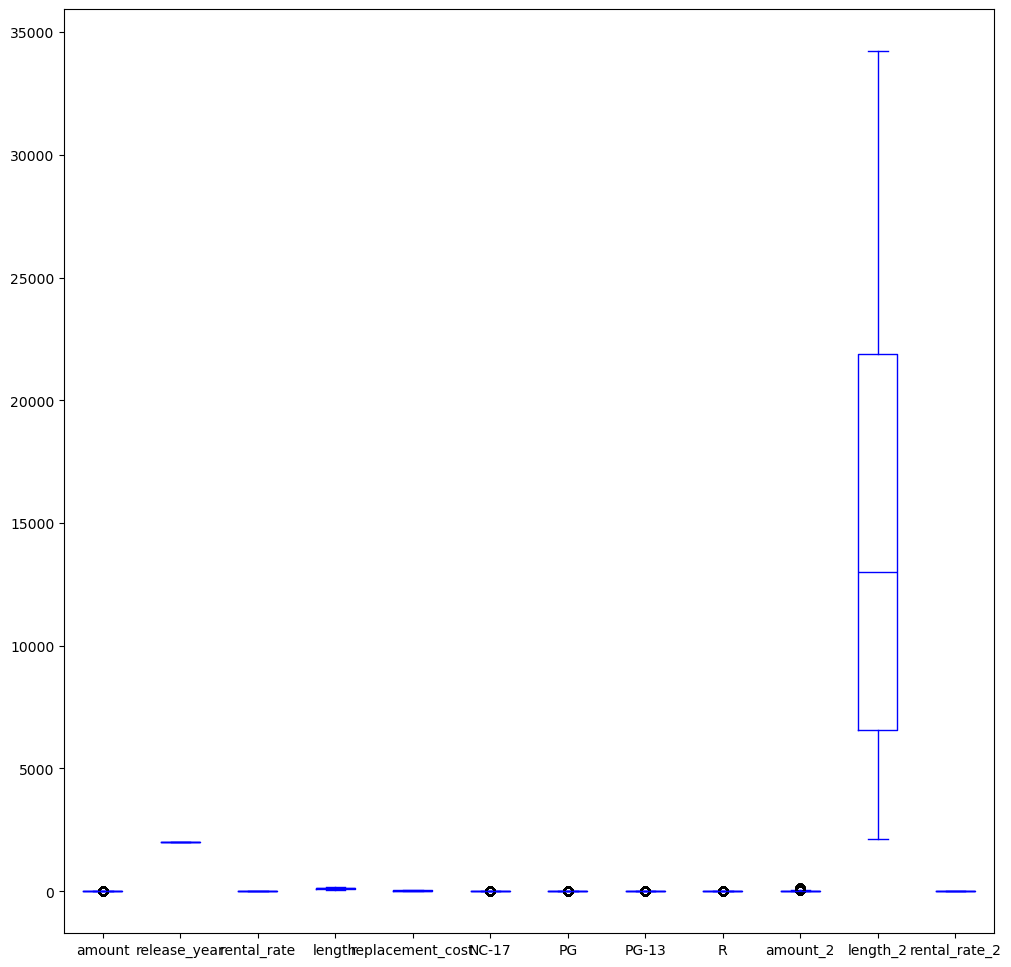

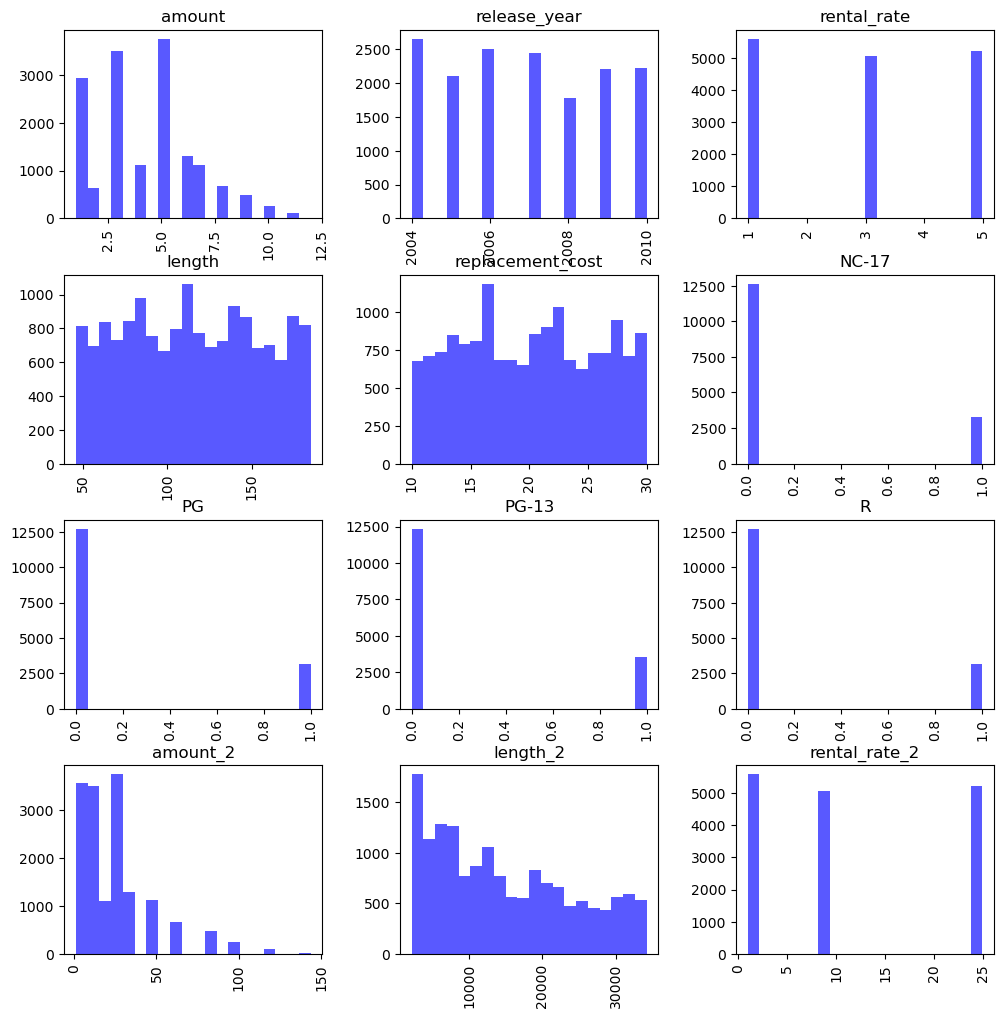

In [551]:
# Visualização de histogramas e Boxplots (checando se há diferença na escala dos dados e a distribuição inicial das variáveis)
boxplot = rental_df.boxplot(figsize=(12, 12), grid=False, color='blue')
histogram = rental_df.hist(figsize=(12, 12), bins = 20, xrot=90, grid=False, color='blue', alpha=0.65)

plt.show()

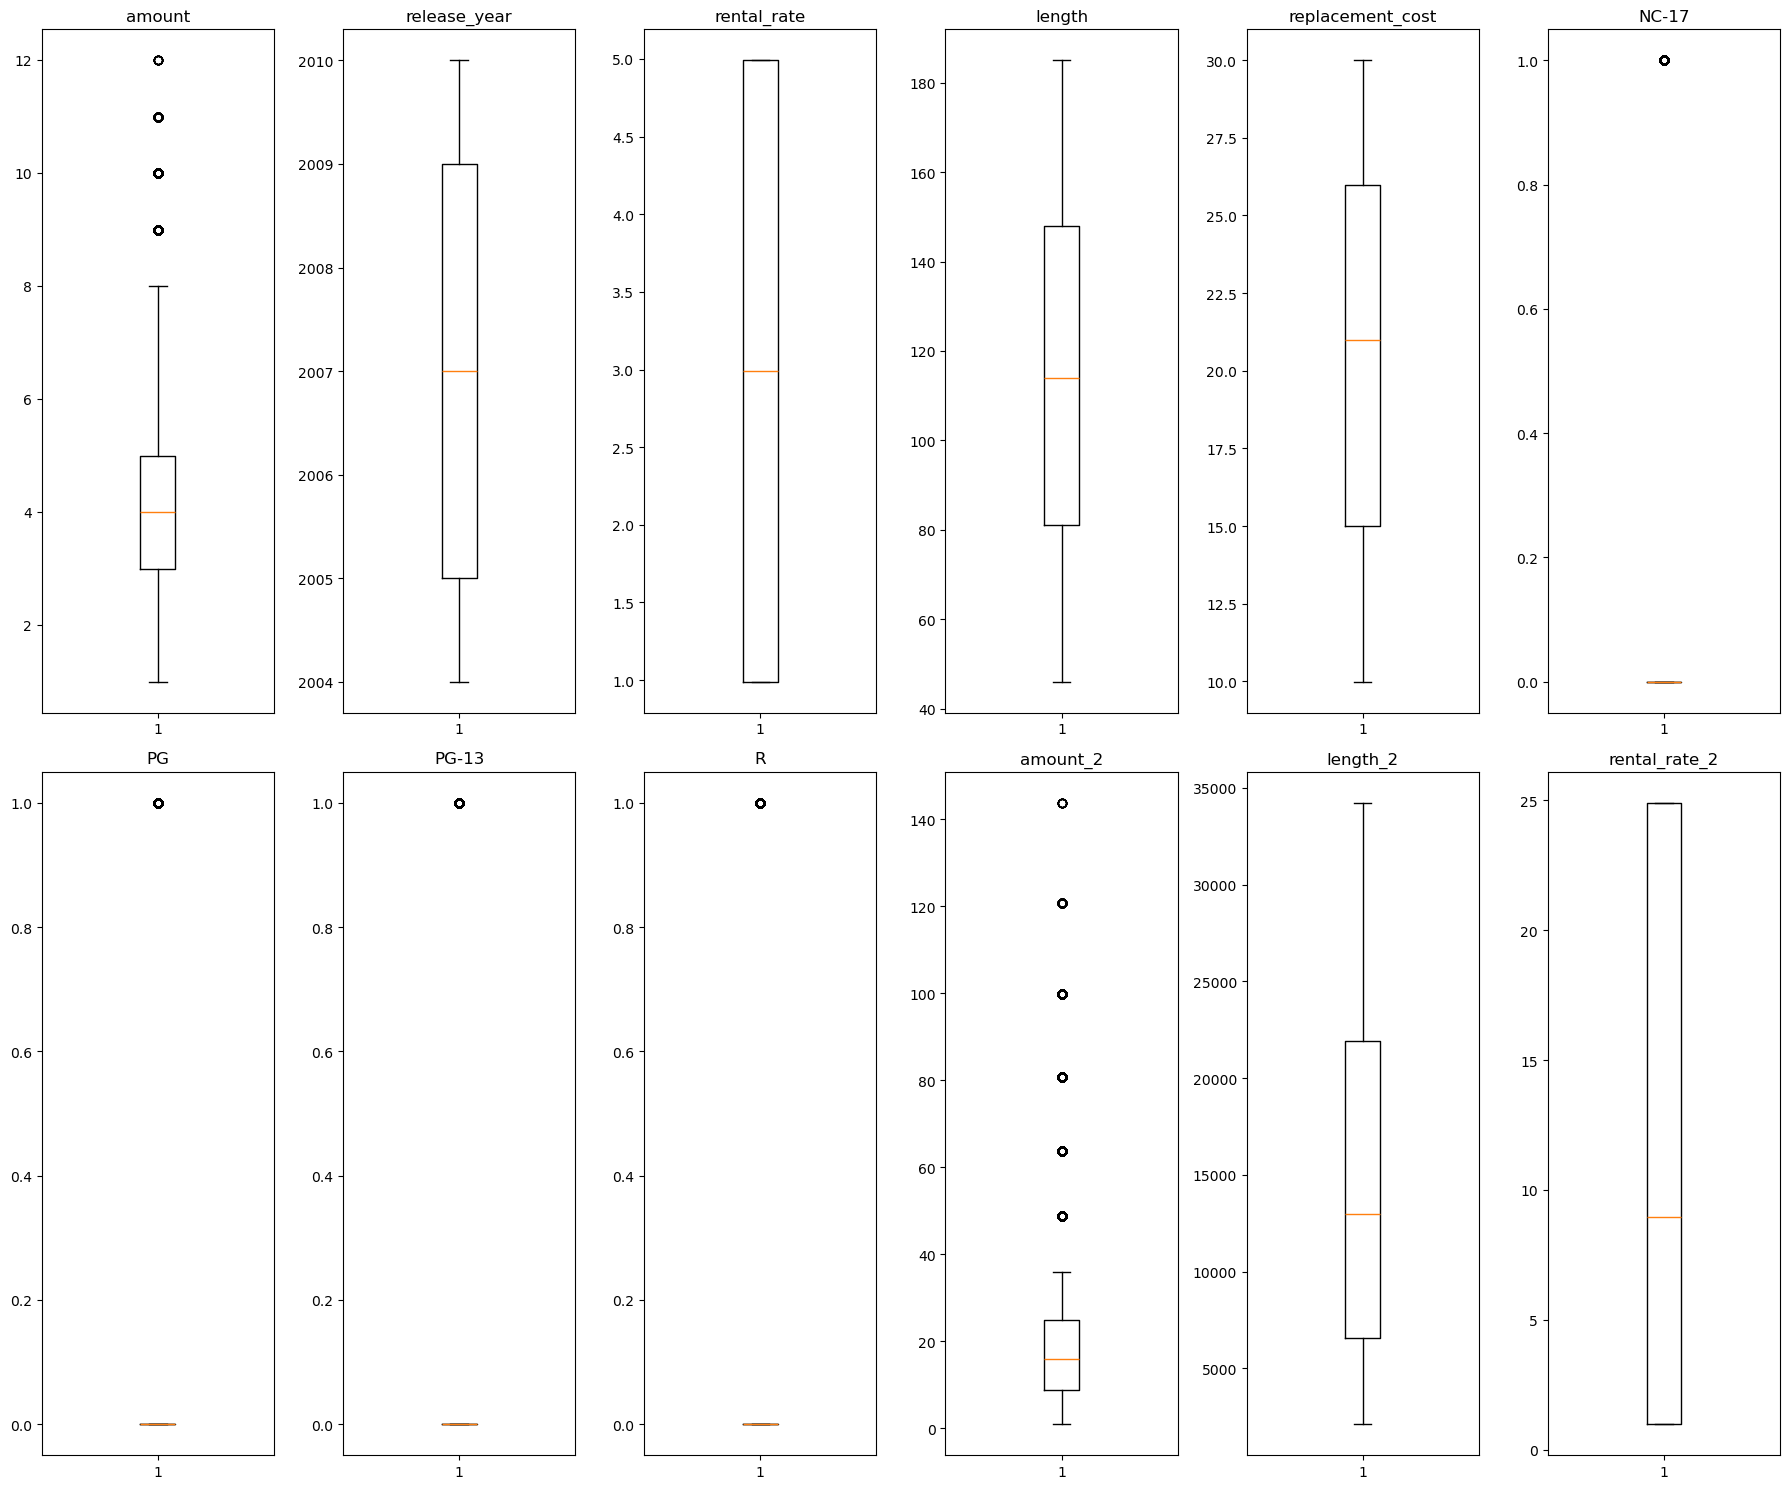

In [552]:
# Creating multiple boxplots of the data individually
import math

plt.figure(figsize=(18, 15))
for i, column in enumerate(rental_df.select_dtypes(include=[np.number]).columns):
    ax = plt.subplot(2, 6, i+1)
    ax.boxplot(rental_df[column])
    ax.set_title(column)
    
plt.tight_layout()
plt.show()


Os dados não indicam uma grande quantidade de outliers, com exceção apenas das features amount e amount_2, que indicam apenas o preço do produto. 

Grande diferença nos intervalos das variáveis -> Scaling


Agora serão aplicados algumas transformações nos dados:
- Separar colunas de datas e de horários em colunas distintas

- Separar as informações de special_features em dummy_variables para que se possa criar um modelo de ML com esta coluna devidamente separada



In [553]:
rental_df['release_year'] = rental_df['release_year'].astype('int')

# Obtaining hours of the rental and return dates
rental_df['rental_date'] = pd.to_datetime(rental_df['rental_date'])
rental_df['return_date'] = pd.to_datetime(rental_df['return_date'])

rental_df['rental_length_days'] = (rental_df['return_date'] - rental_df['rental_date']).dt.days
rental_df.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length_days
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4


In [554]:
# Trabalhando a coluna de special_features para transformar em dummies
expanded_special_features = rental_df[['special_features']]

expanded_special_features = expanded_special_features['special_features'].str.replace(r'[{}"]', '', regex=True) #removendo os caracteres{, } e "
expanded_special_features = expanded_special_features.str.get_dummies(sep=',')
expanded_special_features = expanded_special_features.drop(columns=['Trailers', 'Commentaries'])

In [555]:
# Adicionando as dummies ao dataframe original
rental_df_dummies = pd.concat([rental_df, expanded_special_features], axis=1)
rental_df_dummies = rental_df_dummies.rename(columns={'Deleted Scenes': 'deleted_scenes', 'Behind the Scenes': 'behind_the_scenes'})
print(rental_df_dummies.head())

                rental_date               return_date  amount  release_year  \
0 2005-05-25 02:54:33+00:00 2005-05-28 23:40:33+00:00    2.99          2005   
1 2005-06-15 23:19:16+00:00 2005-06-18 19:24:16+00:00    2.99          2005   
2 2005-07-10 04:27:45+00:00 2005-07-17 10:11:45+00:00    2.99          2005   
3 2005-07-31 12:06:41+00:00 2005-08-02 14:30:41+00:00    2.99          2005   
4 2005-08-19 12:30:04+00:00 2005-08-23 13:35:04+00:00    2.99          2005   

   rental_rate  length  replacement_cost                special_features  \
0         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
1         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
2         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
3         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
4         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   

   NC-17  PG  PG-13  R  amount_2  length_2  rental_rate_2  rental_le

In [556]:
# Dropping rental_date, return_date and special_features columns

rental_df_dummies = rental_df_dummies.drop(['rental_date', 'return_date', 'special_features'], axis=1)
rental_df_dummies.head(15)

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length_days,behind_the_scenes,deleted_scenes
0,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,3,1,0
1,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,2,1,0
2,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,7,1,0
3,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,2,1,0
4,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,4,1,0
5,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,3,1,0
6,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,5,1,0
7,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,4,1,0
8,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,1,1,0
9,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,3,1,0


In [ ]:
# Quantidade de valores únicos em cada coluna
# Dataset pequeno -> da pra verificar se existem valores únicos fora do esperado (absurdos)

for i in rental_df_dummies.columns:
    print(f'Coluna "{i}" contém {rental_df_dummies[i].nunique()} valores únicos')
    print(f'Valores únicos: {rental_df_dummies[i].unique()}\n\n')


Coluna "amount" contém 12 valores únicos
Valores únicos: [ 2.99  4.99  3.99  0.99  1.99  6.99  5.99  8.99  7.99  9.99 10.99 11.99]


Coluna "release_year" contém 7 valores únicos
Valores únicos: [2005 2009 2006 2004 2008 2007 2010]


Coluna "rental_rate" contém 3 valores únicos
Valores únicos: [2.99 0.99 4.99]


Coluna "length" contém 140 valores únicos
Valores únicos: [126. 156. 181.  84.  92. 123.  56.  62. 109. 119. 184. 158.  48. 121.
 166.  81. 136. 147.  58. 182. 141. 112. 148. 135. 114. 165. 100. 130.
 153. 105.  77. 167.  63. 177. 111. 149. 137. 102. 161.  46. 144. 139.
 155. 173.  73. 172. 127.  54. 150. 122. 108. 180.  90. 110. 113.  74.
  88.  97. 140.  61. 162.  99. 176. 116.  64. 133. 107.  86.  93.  91.
  76.  78.  51.  71.  65.  75.  59.  85.  55. 183. 143.  94. 118. 185.
 145. 170.  47. 178. 129. 163. 152.  87. 103.  68. 169.  57.  89. 174.
 106.  83.  53.  69. 146. 151. 120.  70. 101. 168. 117. 179. 125. 104.
 164.  52.  80. 134.  96. 142.  98. 154.  49. 138. 175. 159.

Valores aparentam estar devidamente cleaned e preparados para entrar num pré-processamento

## Etapa 2: Pré-processamento e Avaliando Feature Importance com Lasso Regression

In [558]:
rental_df_cleaned = rental_df_dummies.copy()
rental_df_cleaned

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length_days,behind_the_scenes,deleted_scenes
0,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,3,1,0
1,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,2,1,0
2,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,7,1,0
3,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,2,1,0
4,2.99,2005,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,6.99,2009,4.99,88.0,11.99,0,0,0,1,48.8601,7744.0,24.9001,6,1,1
15857,4.99,2009,4.99,88.0,11.99,0,0,0,1,24.9001,7744.0,24.9001,4,1,1
15858,8.99,2009,4.99,88.0,11.99,0,0,0,1,80.8201,7744.0,24.9001,9,1,1
15859,7.99,2009,4.99,88.0,11.99,0,0,0,1,63.8401,7744.0,24.9001,8,1,1


In [559]:
# Scaling de valores numéricos + Criação de X e y para modelagem
from sklearn.preprocessing import StandardScaler

# definindo quais colunas são dummies para não serem escalados
X = rental_df_cleaned.drop('rental_length_days', axis=1)
cat_cols = ['NC-17', 'PG', 'PG-13', 'R', 'behind_the_scenes', 'deleted_scenes']
dummy_vars = X[cat_cols]

scaler = StandardScaler()
X_numeric = X.drop(dummy_vars.columns, axis=1)

# aplicando o scaler apenas nas colunas numéricas
X_numeric = pd.DataFrame(scaler.fit_transform(X_numeric), columns=X_numeric.columns)

# concatenando as colunas dummies novamente
X = pd.concat([X_numeric, dummy_vars], axis=1)

y = rental_df_cleaned['rental_length_days']

print(f'{X.head()}\n\n')
print(f'{X.shape}\n\n')
print(y.head())

     amount  release_year  rental_rate    length  replacement_cost  amount_2  \
0 -0.519915     -0.931069     0.027822  0.274357         -0.531713 -0.613358   
1 -0.519915     -0.931069     0.027822  0.274357         -0.531713 -0.613358   
2 -0.519915     -0.931069     0.027822  0.274357         -0.531713 -0.613358   
3 -0.519915     -0.931069     0.027822  0.274357         -0.531713 -0.613358   
4 -0.519915     -0.931069     0.027822  0.274357         -0.531713 -0.613358   

   length_2  rental_rate_2  NC-17  PG  PG-13  R  behind_the_scenes  \
0  0.111055      -0.244797      0   0      0  1                  1   
1  0.111055      -0.244797      0   0      0  1                  1   
2  0.111055      -0.244797      0   0      0  1                  1   
3  0.111055      -0.244797      0   0      0  1                  1   
4  0.111055      -0.244797      0   0      0  1                  1   

   deleted_scenes  
0               0  
1               0  
2               0  
3               0 

In [560]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)


In [561]:
from sklearn.linear_model import Lasso

LassoRegressor = Lasso(alpha=0.3, random_state=9)
LassoRegressor.fit(X_train, y_train)
y_pred = LassoRegressor.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R^2: ', LassoRegressor.score(X_test, y_test))

# Checking feature importance

lasso_coef_df = pd.DataFrame([(i, j) for i,j in zip(X_train.columns, LassoRegressor.coef_.tolist())], columns=['feature', 'coef'])
lasso_coef_df.sort_values(by='coef', ascending=False)

MSE:  3.5819754103183583
R^2:  0.4954659022666298


,feature,coef
0,amount,1.790488
1,release_year,0.000000
3,length,0.000000
4,replacement_cost,0.000000
5,amount_2,0.000000
6,length_2,0.000000
8,NC-17,0.000000
9,PG,0.000000
10,PG-13,0.000000
11,R,-0.000000


Verificamos que as principais Features são: amount, rental_rate_2 e rental_rate, embora apenas amount seja > 0 

In [563]:
# Rodando Linear Regression apenas com as features selecionadas pelo Lasso
from sklearn.linear_model import LinearRegression
Reg_Lin = LinearRegression()
Reg_Lin = Reg_Lin.fit(X_lasso_train, y_train)
y_test_pred = Reg_Lin.predict(X_lasso_test)
mse_lin_reg_lasso = mean_squared_error(y_test, y_test_pred)
print(mse_lin_reg_lasso)

4.812297241276239


MSE > 3.0 tanto para Regressão Linear com Regularização quanto para Regressão Linear apenas com as features mais relevantes (filtradas pela Regularização). Nesse caso, deve-se então **melhorar a precisão através de outro modelo**. Vamos testar se um RFRegressor ou um XGBoost já são suficientes num setup básico (sem hiperp tuning)

In [508]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state=9)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
print('MSE: ', rf_mse)
print('R^2: ', rf.score(X_test, y_test))
print(rf.get_params())
print(rf.estimators_[0])
rf_model = rf
rf_mse = rf_mse
print(rf_model, rf_mse)

MSE:  2.0301832917693923
R^2:  0.7140413939203463
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 9, 'verbose': 0, 'warm_start': False}
DecisionTreeRegressor(max_features=1.0, random_state=44556670)
RandomForestRegressor(random_state=9) 2.0301832917693923


In [539]:
from sklearn.ensemble import GradientBoostingRegressor

xgb = GradientBoostingRegressor(random_state=9)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred)
print('MSE: ', mse_xgb)
print('R^2: ', xgb.score(X_test, y_test))
print(xgb.get_params())
xgb_model = xgb
xgb_mse = mse_xgb
print(xgb_model, xgb_mse)


MSE:  2.4253464800253557
R^2:  0.6583812400092269
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 9, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
GradientBoostingRegressor(random_state=9) 2.4253464800253557


Pode-se verificar que o desempenho de RF > XGB > Lasso, sendo RF e XGB suficientes para a solução do problema sem necessidade de hiperparam tuning. 

Fazendo o Hiperparam tuning para RF e XGB apenas para verificar usando Random Search Cross Validation, focando apenas nos parâmetros `n_estimators`, `max_features` e `max_depth`

In [ ]:
# RF Random Search CV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(1, 201, 2),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(1, 21, 1),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1)}

rf = RandomForestRegressor(random_state=9)

rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, random_state=9, n_jobs=-1)

rand_search.fit(X_train, y_train)

hyper_params = rand_search.best_params_
print(hyper_params)


{'n_estimators': 107, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 17}
MSE:  1.9873587017614982
R^2:  0.7200733911859315


In [ ]:
rf_best_model = rand_search.best_estimator_
y_test_pred = rf_best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_test_pred)
print('MSE: ', rf_mse)
print('R^2: ', rf_best_model.score(X_test, y_test))

In [544]:
# XGB Random Search CV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(1, 201, 2),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(1, 21, 1),
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

xgb = GradientBoostingRegressor(random_state=9)

rand_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=100, cv=5, random_state=9, n_jobs=-1)

rand_search.fit(X_train, y_train)
hyper_params = rand_search.best_params_
print(hyper_params)

{'subsample': 0.6, 'n_estimators': 101, 'max_features': 'log2', 'max_depth': 9, 'learning_rate': 0.1}


In [545]:
xgb_best_model = rand_search.best_estimator_
y_test_pred = xgb_best_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_test_pred)
print('MSE: ', xgb_mse)
print('R^2: ', xgb_best_model.score(X_test, y_test))

MSE:  1.9260699301584552
R^2:  0.7287061347253908


Após o Hyperparameter Tuning, verificamos que ambos os modelos RandomForestRegressor e XGBoost apresentam um desempenho próximo, sendo que o XGBoost apresenta um desempenho levemente melhor que o RF! 

O desempenho do RF não é tão grande quando comparados ao algoritmo não tunado:

- Não tunado  
    MSE:  2.0301832917693923  
    R^2:  0.7140413939203463  

- Tunado  
    MSE:  1.9873587017614982  
    R^2:  0.7200733911859315


Desempenho de XGBoost tem uma melhora superior que o de RF

- Não tunado  
    MSE:  2.4253464800253557  
    R^2:  0.6583812400092269  

- Tunado  
    MSE:  1.9260699301584552  
    R^2:  0.7287061347253908  


# Solução do Problema (Gabarito)


In [509]:
# Start your coding from below
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# For lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Run OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Read in data
df_rental = pd.read_csv("rental_info.csv")



In [510]:
# Add information on rental duration
df_rental["rental_length"] = pd.to_datetime(df_rental["return_date"]) - pd.to_datetime(df_rental["rental_date"])
df_rental["rental_length_days"] = df_rental["rental_length"].dt.days
df_rental.head()


,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length,rental_length_days
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3 days 20:46:00,3
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 20:05:00,2
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7 days 05:44:00,7
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 02:24:00,2
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4 days 01:05:00,4


In [511]:
### Add dummy variables
# Add dummy for deleted scenes
df_rental["deleted_scenes"] =  np.where(df_rental["special_features"].str.contains("Deleted Scenes"), 1, 0)
# Add dummy for behind the scenes
df_rental["behind_the_scenes"] =  np.where(df_rental["special_features"].str.contains("Behind the Scenes"), 1, 0)

print(df_rental.head())

# Choose columns to drop
cols_to_drop = ["special_features", "rental_length", "rental_length_days", "rental_date", "return_date"]



                 rental_date                return_date  amount  release_year  \
0  2005-05-25 02:54:33+00:00  2005-05-28 23:40:33+00:00    2.99        2005.0   
1  2005-06-15 23:19:16+00:00  2005-06-18 19:24:16+00:00    2.99        2005.0   
2  2005-07-10 04:27:45+00:00  2005-07-17 10:11:45+00:00    2.99        2005.0   
3  2005-07-31 12:06:41+00:00  2005-08-02 14:30:41+00:00    2.99        2005.0   
4  2005-08-19 12:30:04+00:00  2005-08-23 13:35:04+00:00    2.99        2005.0   

   rental_rate  length  replacement_cost                special_features  \
0         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
1         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
2         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
3         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
4         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   

   NC-17  PG  PG-13  R  amount_2  length_2  rental_rate_

In [516]:
# Split into feature and target sets
X = df_rental.drop(cols_to_drop, axis=1)
y = df_rental["rental_length_days"]

# Further split into training and test data
X_train,X_test,y_train,y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.2, 
                                                 random_state=9)

# Checando os dados de X da solução -> verificando se bate com o meu X
print(X.head())

   amount  release_year  rental_rate  length  replacement_cost  NC-17  PG  \
0    2.99        2005.0         2.99   126.0             16.99      0   0   
1    2.99        2005.0         2.99   126.0             16.99      0   0   
2    2.99        2005.0         2.99   126.0             16.99      0   0   
3    2.99        2005.0         2.99   126.0             16.99      0   0   
4    2.99        2005.0         2.99   126.0             16.99      0   0   

   PG-13  R  amount_2  length_2  rental_rate_2  deleted_scenes  \
0      0  1    8.9401   15876.0         8.9401               0   
1      0  1    8.9401   15876.0         8.9401               0   
2      0  1    8.9401   15876.0         8.9401               0   
3      0  1    8.9401   15876.0         8.9401               0   
4      0  1    8.9401   15876.0         8.9401               0   

   behind_the_scenes  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  


**OBSERVAÇÃO**: A solução fornecida não utiliza scaling, mesmo possuindo variação significativa entre as variáveis. Para Lasso, isso pode fazer diferença, portanto é algo que não concordo com o approach, mesmo que o resultado alcançado seja similar.

In [ ]:
# Create the Lasso model
lasso = Lasso(alpha=0.3, random_state=9) 

# Train the model and access the coefficients
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_
print(lasso_coef)
# Perform feature selection by choosing columns with positive coefficients
X_lasso_train, X_lasso_test = X_train.iloc[:, lasso_coef > 0], X_test.iloc[:, lasso_coef > 0]

print(pd.DataFrame([(i, j) for i,j in zip(X_train.columns, lasso_coef)], columns=['feature', 'coef']))

# Verificando o MSE do modelo lasso -> Não estava na solução à princípio, apenas para verificação com minha resposta
y_test_pred = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_test_pred)
print(mse_lasso)

[ 5.84104424e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  4.36220109e-02  3.01167812e-06 -1.52983561e-01
 -0.00000000e+00  0.00000000e+00]
              feature      coef
0              amount  0.584104
1        release_year  0.000000
2         rental_rate -0.000000
3              length  0.000000
4    replacement_cost -0.000000
5               NC-17  0.000000
6                  PG  0.000000
7               PG-13  0.000000
8                   R -0.000000
9            amount_2  0.043622
10           length_2  0.000003
11      rental_rate_2 -0.152984
12     deleted_scenes -0.000000
13  behind_the_scenes  0.000000
3.3166576396193497


In [518]:
# Run OLS models on lasso chosen regression
ols = LinearRegression()
ols = ols.fit(X_lasso_train, y_train)
y_test_pred = ols.predict(X_lasso_test)
mse_lin_reg_lasso = mean_squared_error(y_test, y_test_pred)
print(mse_lin_reg_lasso)


4.812297241276239


In [519]:
# Random forest hyperparameter space
param_dist = {'n_estimators': np.arange(1,101,1),
          'max_depth':np.arange(1,11,1)}

# Create a random forest regressor
rf = RandomForestRegressor()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions=param_dist, 
                                 cv=5, 
                                 random_state=9)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best hyper param
hyper_params = rand_search.best_params_




In [520]:
print(hyper_params)

{'n_estimators': 51, 'max_depth': 10}


In [521]:
# Run the random forest on the chosen hyper parameters
rf = RandomForestRegressor(n_estimators=hyper_params["n_estimators"], 
                           max_depth=hyper_params["max_depth"], 
                           random_state=9)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
mse_random_forest= mean_squared_error(y_test, rf_pred)

# Random forest gives lowest MSE so:
best_model = rf
best_mse = mse_random_forest

print(best_model, best_mse)

RandomForestRegressor(max_depth=10, n_estimators=51, random_state=9) 2.225667528098759


In [522]:
from sklearn.linear_model import Lasso

LassoRegressor = Lasso(alpha=0.3, random_state=9)
LassoRegressor.fit(X_train, y_train)
y_pred = LassoRegressor.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R^2: ', LassoRegressor.score(X_test, y_test))

# Checking feature importance

lasso_coef_df = pd.DataFrame([(i, j) for i,j in zip(rental_df_cleaned.drop('rental_length_days', axis=1).columns, LassoRegressor.coef_.tolist())], columns=['feature', 'coef'])
lasso_coef_df.sort_values(by='coef', ascending=False)

MSE:  3.3166576396193497
R^2:  0.53283686290099


,feature,coef
0,amount,0.584104
9,amount_2,0.043622
10,length_2,0.000003
1,release_year,0.000000
2,rental_rate,-0.000000
3,length,0.000000
4,replacement_cost,-0.000000
5,NC-17,0.000000
6,PG,0.000000
7,PG-13,0.000000
